# REAL TIME COMMUNICATION  POWERED BY AI FOR SPECIALLY ABLED


# INSTALLING LIBRARIES

In [4]:
!pip install Keras


In [5]:
!pip install tensorflow


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D, Flatten

In [19]:
#image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)

In [28]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JRKmAMyQfVLk9P4FCU7I6HKw-ewJ6HlH3myvHIccsbmJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-fywzgetwhoy2hk'
object_key = 'conversation engine for deaf and dumb.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [30]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [31]:
ls

Dataset/


In [32]:
pwd

'/home/wsuser/work'

# TRAINING AND TESTING DATASETS

In [34]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/Dataset/training_set",target_size=(64,64),class_mode="categorical",batch_size=25)

Found 15750 images belonging to 9 classes.


In [35]:
x_test=test_datagen.flow_from_directory("/home/wsuser/work/Dataset/test_set",target_size=(64,64),
class_mode='categorical' , batch_size=25)

Found 2250 images belonging to 9 classes.


In [36]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [37]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [38]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [39]:
test_datagen=ImageDataGenerator(rescale=1./255)

# MODEL BUILDING 

In [40]:
model=Sequential()

In [41]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model.add(Flatten())

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


# LAYERS-HIDDEN AND OUTPUT LAYER 

In [45]:
model.add(Dense(units = 300, activation='relu'))

In [46]:
model.add(Dense(units = 9, activation='softmax'))

# OPTIMIZING THE MODEL

In [47]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
len(x_train)

630

In [49]:
len(x_test)

90

# FITTING THE MODEL

In [50]:
### model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=630,epochs=10,validation_data=x_test,validation_steps=90)
#model.fit(x_train, epochs=100, verbose=1)

/tmp/wsuser/ipykernel_164/1177640488.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=630,epochs=10,validation_data=x_test,validation_steps=90)


Epoch 1/10
630/630 [==============================] - 110s 173ms/step - loss: 0.2270 - accuracy: 0.9373 - val_loss: 0.1867 - val_accuracy: 0.9716
Epoch 2/10
630/630 [==============================] - 109s 173ms/step - loss: 0.0291 - accuracy: 0.9911 - val_loss: 0.2532 - val_accuracy: 0.9733
Epoch 3/10
630/630 [==============================] - 109s 172ms/step - loss: 0.0173 - accuracy: 0.9946 - val_loss: 0.2335 - val_accuracy: 0.9742
Epoch 4/10
630/630 [==============================] - 108s 171ms/step - loss: 0.0095 - accuracy: 0.9973 - val_loss: 0.3331 - val_accuracy: 0.9760
Epoch 5/10
630/630 [==============================] - 109s 173ms/step - loss: 0.0116 - accuracy: 0.9965 - val_loss: 0.3535 - val_accuracy: 0.9778
Epoch 6/10
630/630 [==============================] - 109s 172ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.4501 - val_accuracy: 0.9773
Epoch 7/10
630/630 [==============================] - 108s 171ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.4214 -

# SAVE THE MODEL

In [51]:
ls


Dataset/


In [52]:
pwd

'/home/wsuser/work'

In [54]:
model.save('zxcvb.h5')

In [55]:
zxcvb.h5


NameError: name 'zxcvb' is not defined

In [56]:
ls

Dataset/  zxcvb.h5


# CONVERTING ZIP FILE TO TAR FILE FOR LOCAL USE

In [60]:
!tar -zcvf image.Classification.model_new.tgz zxcvb.h5

zxcvb.h5


In [58]:
ls -1

Dataset/
image.Classification.model_new.tgz
zxcvb.h5


# Ibm deployment

In [61]:
#installing the machine learning repository
!pip install watson_machine_learning_client --upgrade

     |████████████████████████████████| 538 kB 37.8 MB/s eta 0:00:01


In [62]:
from ibm_watson_machine_learning import APIClient

In [63]:
url_credentials = {
    "url": "https://eu-de.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "yJ8GmUtJyYyy2WEIf3xUCVNg55x1euW_s6099p5fCRc7"
}

In [64]:
client = APIClient(url_credentials)

In [65]:
client

In [66]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
0d906edb-038d-4652-a8ff-8c294260f95e  deploy_1  2022-11-17T17:48:49.740Z
------------------------------------  --------  ------------------------


In [68]:
space_id="0d906edb-038d-4652-a8ff-8c294260f95e"

In [69]:
client.set.default_space(space_id)

'SUCCESS'

In [71]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [73]:
software_space_uid=client.software_specifications.get_id_by_name("tensorflow_1.15-py3.6")

In [74]:
software_space_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [91]:
model_details=client.repository.store_model(model='Classification.model_new.tgz',
               meta_props={client.repository.ModelMetaNames.NAME:"cnn model",
                          client.repository.ModelMetaNames.TYPE:"tensorflow_2.7.2",
                           client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid })     

Failure during getting trained models details. (GET https://eu-de.ml.cloud.ibm.com/ml/v4/trainings/Classification.model_new.tgz?version=2021-06-24&space_id=0d906edb-038d-4652-a8ff-8c294260f95e)
Status code: 404, body: {"trace":"49cd0c3369a2aa9e7e2a3426fcf515da","errors":[{"code":"training_job_run_not_found","message":"Backend persistence error (404): GET request failed","more_info":"http://watson-ml-api.mybluemix.net/"}],"status_code":"404"}
Unexpected type of 'model parameter', expected: model path / training_id, actual: 'Classification.model_new.tgz'.


UnexpectedType: Unexpected type of 'model parameter', expected: model path / training_id, actual: 'Classification.model_new.tgz'.

In [94]:
model_details=client.repository.store_model(model="zxcvb.tgz",meta_props={
client.repository.ModelMetaNames.NAME: "CNN Model Building",
client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_space_uid
})

Failure during getting trained models details. (GET https://eu-de.ml.cloud.ibm.com/ml/v4/trainings/zxcvb.tgz?version=2021-06-24&space_id=0d906edb-038d-4652-a8ff-8c294260f95e)
Status code: 404, body: {"trace":"5b2a36165fb1f2120719b08f9b4b43fa","errors":[{"code":"training_job_run_not_found","message":"Backend persistence error (404): GET request failed","more_info":"http://watson-ml-api.mybluemix.net/"}],"status_code":"404"}
Unexpected type of 'model parameter', expected: model path / training_id, actual: 'zxcvb.tgz'.


UnexpectedType: Unexpected type of 'model parameter', expected: model path / training_id, actual: 'zxcvb.tgz'.

In [95]:
model_id

NameError: name 'model_id' is not defined

In [96]:
model.save('zxcvb.h5')

# DOWNLOADING THE TAR FILE ON CLIENT REPOSITORY

In [97]:
client.repository.download(model_id, 'my_model.tar.gz')

NameError: name 'model_id' is not defined

# TEST THE MODEL

In [98]:
import numpy as np
from tensorflow.keras.models import load_model
from keras.preprocessing import image

# LOADING THE MODEL

In [99]:
#Load the model
model=load_model('zxcvb.h5')

# TESTING ON SEVERAL TESTING IMAGES# 

In [100]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JRKmAMyQfVLk9P4FCU7I6HKw-ewJ6HlH3myvHIccsbmJ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'realtimecommunicationsystempowere-donotdelete-pr-fywzgetwhoy2hk'
object_key = '7.png'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [102]:
ls

Dataset/  image.Classification.model_new.tgz  zxcvb.h5


In [103]:
pwd

'/home/wsuser/work'

In [105]:
cd /home/wsuser/work/Dataset/test_set/

/home/wsuser/work/Dataset/test_set


In [106]:
ls

A/  B/  C/  D/  E/  F/  G/  H/  I/


In [107]:
cd /home/wsuser/work/Dataset/test_set/C/

/home/wsuser/work/Dataset/test_set/C


In [108]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [109]:
#img = image.load_img(streaming_body_8,target_size=(64, 64))
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/C/100.png")

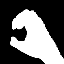

In [110]:
img

In [129]:
img2=image.load_img(r"/home/wsuser/work/Dataset/test_set/B/102.png")

In [130]:
cd /home/wsuser/work/Dataset/test_set/B/

/home/wsuser/work/Dataset/test_set/B


In [131]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [111]:
cd /home/wsuser/work/Dataset/test_set/F/

/home/wsuser/work/Dataset/test_set/F


In [112]:
ls

100.png  126.png  151.png  177.png  201.png  227.png  26.png  51.png  77.png
101.png  127.png  152.png  178.png  202.png  228.png  27.png  52.png  78.png
102.png  128.png  153.png  179.png  203.png  229.png  28.png  53.png  79.png
103.png  129.png  154.png  17.png   204.png  22.png   29.png  54.png  7.png
104.png  12.png   155.png  180.png  205.png  230.png  2.png   55.png  80.png
105.png  130.png  156.png  181.png  206.png  231.png  30.png  56.png  81.png
106.png  131.png  157.png  182.png  207.png  232.png  31.png  57.png  82.png
107.png  132.png  158.png  183.png  208.png  233.png  32.png  58.png  83.png
108.png  133.png  159.png  184.png  209.png  234.png  33.png  59.png  84.png
109.png  134.png  15.png   185.png  20.png   235.png  34.png  5.png   85.png
10.png   135.png  160.png  186.png  210.png  236.png  35.png  60.png  86.png
110.png  136.png  161.png  187.png  211.png  237.png  36.png  61.png  87.png
111.png  137.png  162.png  188.png  212.png  238.png  37.png  62.png  88.png


In [115]:
#img = image.load_img(streaming_body_8,target_size=(64, 64))
img1=image.load_img(r"/home/wsuser/work/Dataset/test_set/F/100.png")

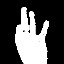

In [116]:
img1

In [132]:
x=image.img_to_array(img)

In [133]:
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [134]:
x=np.expand_dims(x,axis=1)

In [127]:
x

array([[[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       ...,



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]],



       [[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]]]

In [135]:
y=np.argmax(model.predict(x),axis=1)

ValueError: in user code:

    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 1, 64, 3)


In [122]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [123]:
index=['A','B','C','D','E','F','G','H','I']

In [136]:
img=image.load_img(r"/home/wsuser/work/Dataset/test_set/A/90.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'A'

In [137]:
img=image.load_img( "/home/wsuser/work/Dataset/test_set/D/1.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis = 1)
index=['A','B','C','D','E','F','G','H','I']
index[y[0]]

'D'

In [138]:
cd /home/wsuser/work/

/home/wsuser/work


In [139]:
!tar -zcvf Dataset-Classification.model_new.tgz zxcvb.h5

zxcvb.h5


In [140]:
ls 

Dataset/                              image.Classification.model_new.tgz
Dataset-Classification.model_new.tgz  zxcvb.h5


In [141]:
import tensorflow as tf
tf .__version__

'2.7.2'

# IBM DEPLOYMENT

In [142]:
!pip install watson-machine-learning-client  

In [144]:
from ibm_watson_machine_learning import APIClient
url_credentials = {
    "url": "https://eu-de.ml.cloud.ibm.com",
    #"apikey": "sqLVTXSP3nnAKfzJ1rKRKCpNzS_XZ8_HXa9FRwV7BvOP"
    "apikey":  "yJ8GmUtJyYyy2WEIf3xUCVNg55x1euW_s6099p5fCRc7"
}
client=APIClient(url_credentials)

# CLIENT

In [152]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------  ------------------------
ID                                    NAME      CREATED
0d906edb-038d-4652-a8ff-8c294260f95e  deploy_1  2022-11-17T17:48:49.740Z
------------------------------------  --------  ------------------------


In [153]:
space_id="0d906edb-038d-4652-a8ff-8c294260f95e"

In [155]:
client.set.default_space(space_id)

'SUCCESS'

In [156]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [157]:
model_details=client.repository.store_model(model='zxcvb.tgz',meta_props={
client.repository.ModelMetaNames.NAME: "CNN Model Building",
client.repository.ModelMetaNames.TYPE: 'tensorflow_2.7.2',
client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

NameError: name 'software_spec_uid' is not defined

In [158]:
model_id=client.repository.get_model_id(model_details)

NameError: name 'model_details' is not defined

In [159]:
model_id

NameError: name 'model_id' is not defined